In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 10)
from data.loader import load_data
import data
from matplotlib import pyplot as plt
import numpy as np
import utils
import matplotlib.image as mpimg
import importlib

Populating the interactive namespace from numpy and matplotlib


In [40]:
class Argument():
    def __init__(self, params):
        self.datadir = params['datadir']
        self.view = params['view']
        self.task = params['task']
        self.scale = params['scale']
        self.horizontal_flip = params['horizontal_flip']
        self.rotate = params['rotate']
        self.workers = params['workers']
        self.toy = params['toy']
        self.verbose = params['verbose']
        self.weighted_loss = params['weighted_loss']
        self.batch_size = params['batch_size']
        self.batch_size = params['batch_size']
        self.use_color_jitter = params['use_color_jitter']
        self.use_random_resized_crop = params['use_random_resized_crop']
        self.fix_num_slices = params['fix_num_slices']
        self.num_slices = params['num_slices']
        self.fixing_method = params['fixing_method']
        self.extension = params['extension']
        self.shift = params['shift']
        self.reverse = params['reverse']
        
        self.fixing_method = params['fixing_method']
        self.rgb = params['rgb']
        self.normalize = params['normalize']

In [88]:
args_ = {}    
args_['datadir'] = '/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/data-3-views/'
args_['view'] = 'sagittal'
args_['task'] = 'all'
args_['horizontal_flip'] = True
args_['fix_num_slices'] = True
args_['fixing_method'] = 'uniform'
args_['num_slices'] = 8
args_['extension'] = 'npy'
args_['rotate'] = 5
args_['shift'] = 50
args_['reverse'] = False
args_['workers'] = False
args_['toy'] = False
args_['verbose'] = False
args_['weighted_loss'] = False
args_['batch_size'] = 1

args_['use_color_jitter'] = False
args_['use_random_resized_crop'] = True

args_['rgb'] = True
args_['normalize'] = 'knee'

In [89]:
importlib.reload(data.loader)

<module 'data.loader' from '/net/10.79.12.62/deep/group/aihc-bootcamp-winter2018/mbereket/medical-imaging-starter-pack/data/loader.py'>

In [90]:
args_['scale'] = 256
args = Argument(args_)
print(args.extension)
# Load the datasets as a Dataset object
train_dataset = data.loader.Dataset(args, 'train')
valid_dataset = data.loader.Dataset(args, 'valid')
train_loader, valid_loader, test_loader, rad_loader = load_data(args)

npy
Task all
/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/data-3-views/train.csv
Abnormal counts: Counter({1: 464, 0: 228})
ACL counts: Counter({0: 613, 1: 79})
Meniscus counts: Counter({0: 505, 1: 187})
Task all
/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/data-3-views/valid.csv
Abnormal counts: Counter({1: 57, 0: 30})
ACL counts: Counter({0: 81, 1: 6})
Meniscus counts: Counter({0: 64, 1: 23})
Task all
/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/data-3-views/train.csv
Abnormal counts: Counter({1: 464, 0: 228})
ACL counts: Counter({0: 613, 1: 79})
Meniscus counts: Counter({0: 505, 1: 187})
Task all
/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/data-3-views/valid.csv
Abnormal counts: Counter({1: 57, 0: 30})
ACL counts: Counter({0: 81, 1: 6})
Meniscus counts: Counter({0: 64, 1: 23})
Task all
/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/data-3-views/t

In [91]:
# print(type(train_dataset))
# print(type(train_dataset[0]))
# print(train_dataset[0][0].keys())
# print(type(train_dataset[0][1]))
# print(train_dataset[0][1])
# print(train_dataset.fixing_method)
print(train_loader.dataset.view)
print(train_loader.dataset.task)

sagittal
all


In [92]:
for obj in train_loader:
    break
    

sagittal (1, 32, 256, 256)
(8, 3, 256, 256)


In [93]:
img_dict, label = obj
print(img_dict.keys())
print(train_loader.dataset.view)
#print(img_dict[train_loader.dataset.view])

dict_keys(['sagittal'])
sagittal


In [104]:
def floatBetween01(slices):
    val_range = np.amax(slices) - np.amin(slices)
    return (slices - np.amin(slices)) / val_range

def displayImages(slices, label):
    slices = np.swapaxes(slices, 1, 2)
    slices = np.swapaxes(slices, 2, 3)
    # shape: [seq length, rows, cols, rgb]
    print(slices.shape)
    fig = plt.figure(figsize=(40, 40))
    dim = np.ceil(np.sqrt(slices.shape[0]))
    print('label', label)
    for i in range(slices.shape[0]):
        img = slices[i].squeeze()
        # print(img.shape)
        fig.add_subplot(dim, dim, i+1)
        plt.imshow(img)
    plt.show()

def viewImages(dataset, num_negatives=1, num_positives=1, if_all='acl'):
    negatives = 0
    positives = 0
    task = dataset.task if dataset.task != 'all' else if_all
    if num_negatives != 0:
        negative_indices = list(zip(*((dataset.labels[task] == 0).nonzero())))
        print(negative_indices[:10])
        for i in range(num_negatives):
            print(negative_indices[i])
            img_dict, label = dataset[negative_indices[i][0]]
            for view, slices in img_dict.items():
                print(view)
                if slices is None:
                    print('Not available')
                else:
                    if dataset.normalize_slice:
                        slices = floatBetween01(slices)
                        print(np.amin(slices), np.amax(slices))
                    else:
                        slices = slices.astype('uint8')
                    displayImages(slices, label)
    if num_positives != 0:
        positive_indices = list(zip(*((dataset.labels[task] != 0).nonzero())))
        for i in range(num_positives):
            img_dict, label = dataset[positive_indices[i][0]]
            for view, slices in img_dict.items():
                print(view)
                if slices is None:
                    print('Not available')
                else:
                    if dataset.normalize_slice:
                        slices = floatBetween01(slices)
                        print(np.amin(slices), np.amax(slices))
                    else:
                        slices = slices.astype('uint8')
                    displayImages(slices, label)

sagittal (1, 23, 256, 256)
(8, 3, 256, 256)
sagittal
0.0 1.0
(8, 256, 256, 3)
label 
 1
 1
 0
[torch.LongTensor of size 3]



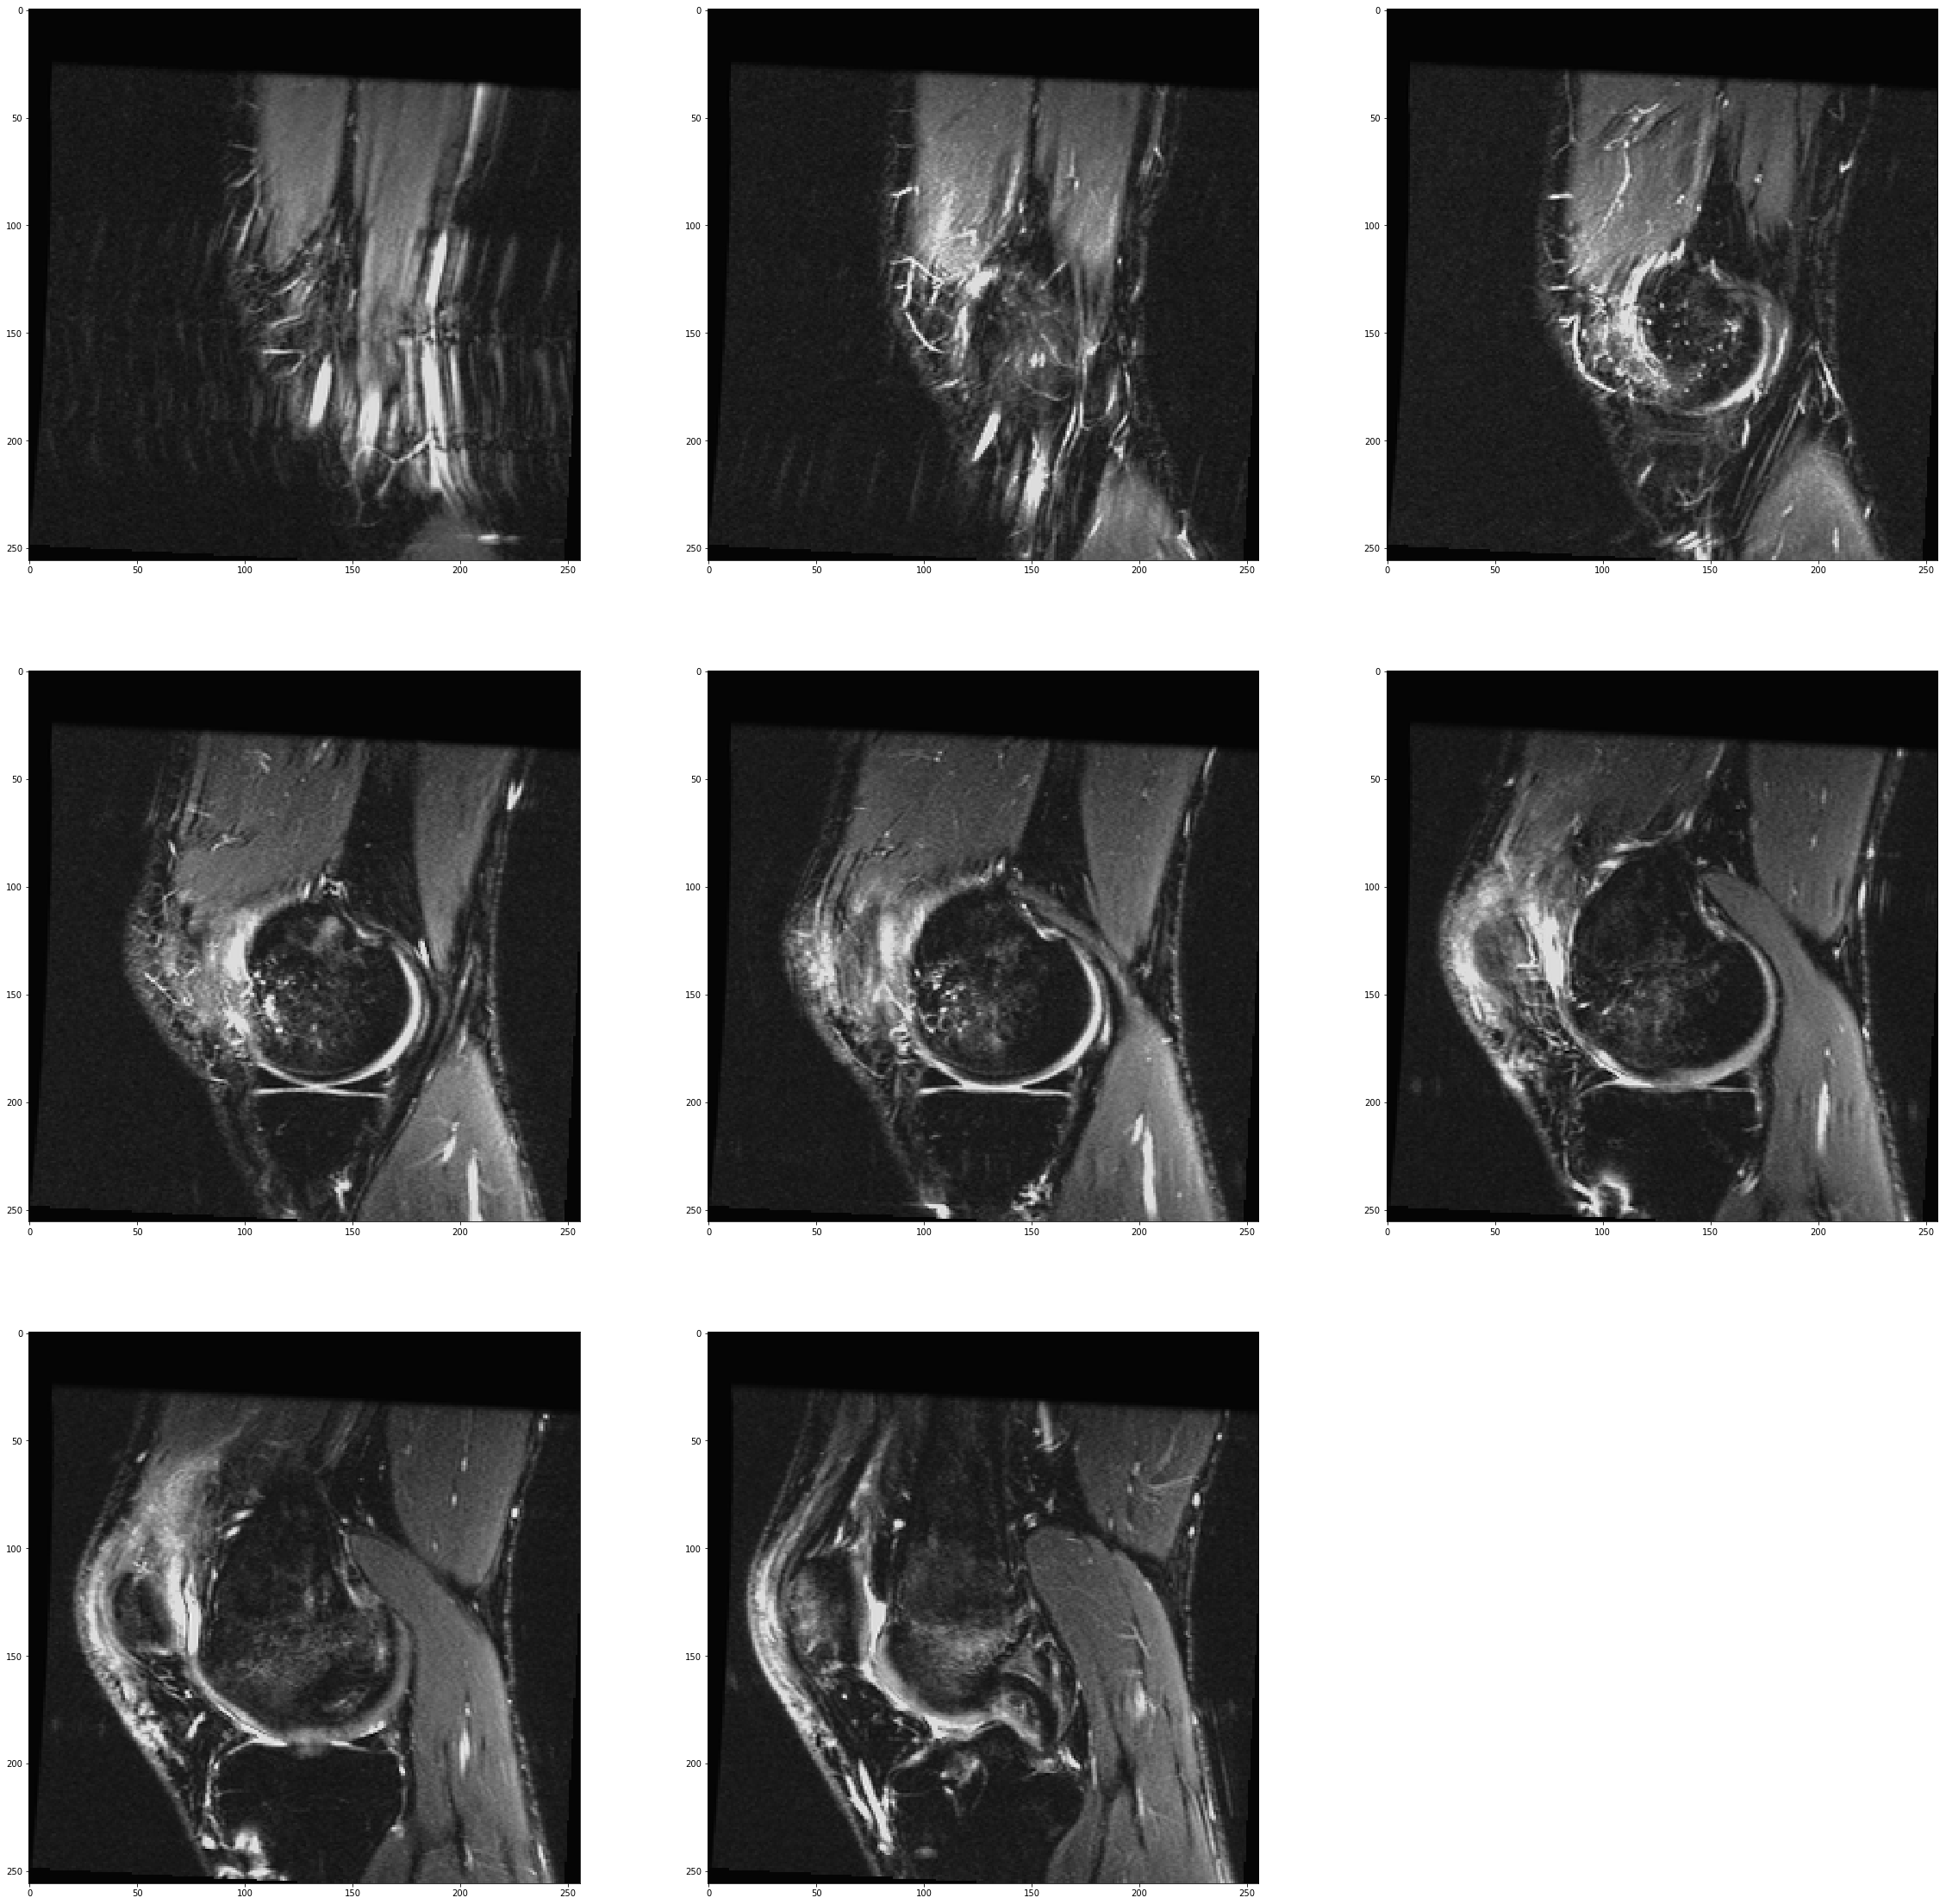

sagittal (1, 22, 256, 256)
(8, 3, 256, 256)
sagittal
0.0 1.0
(8, 256, 256, 3)
label 
 1
 1
 0
[torch.LongTensor of size 3]



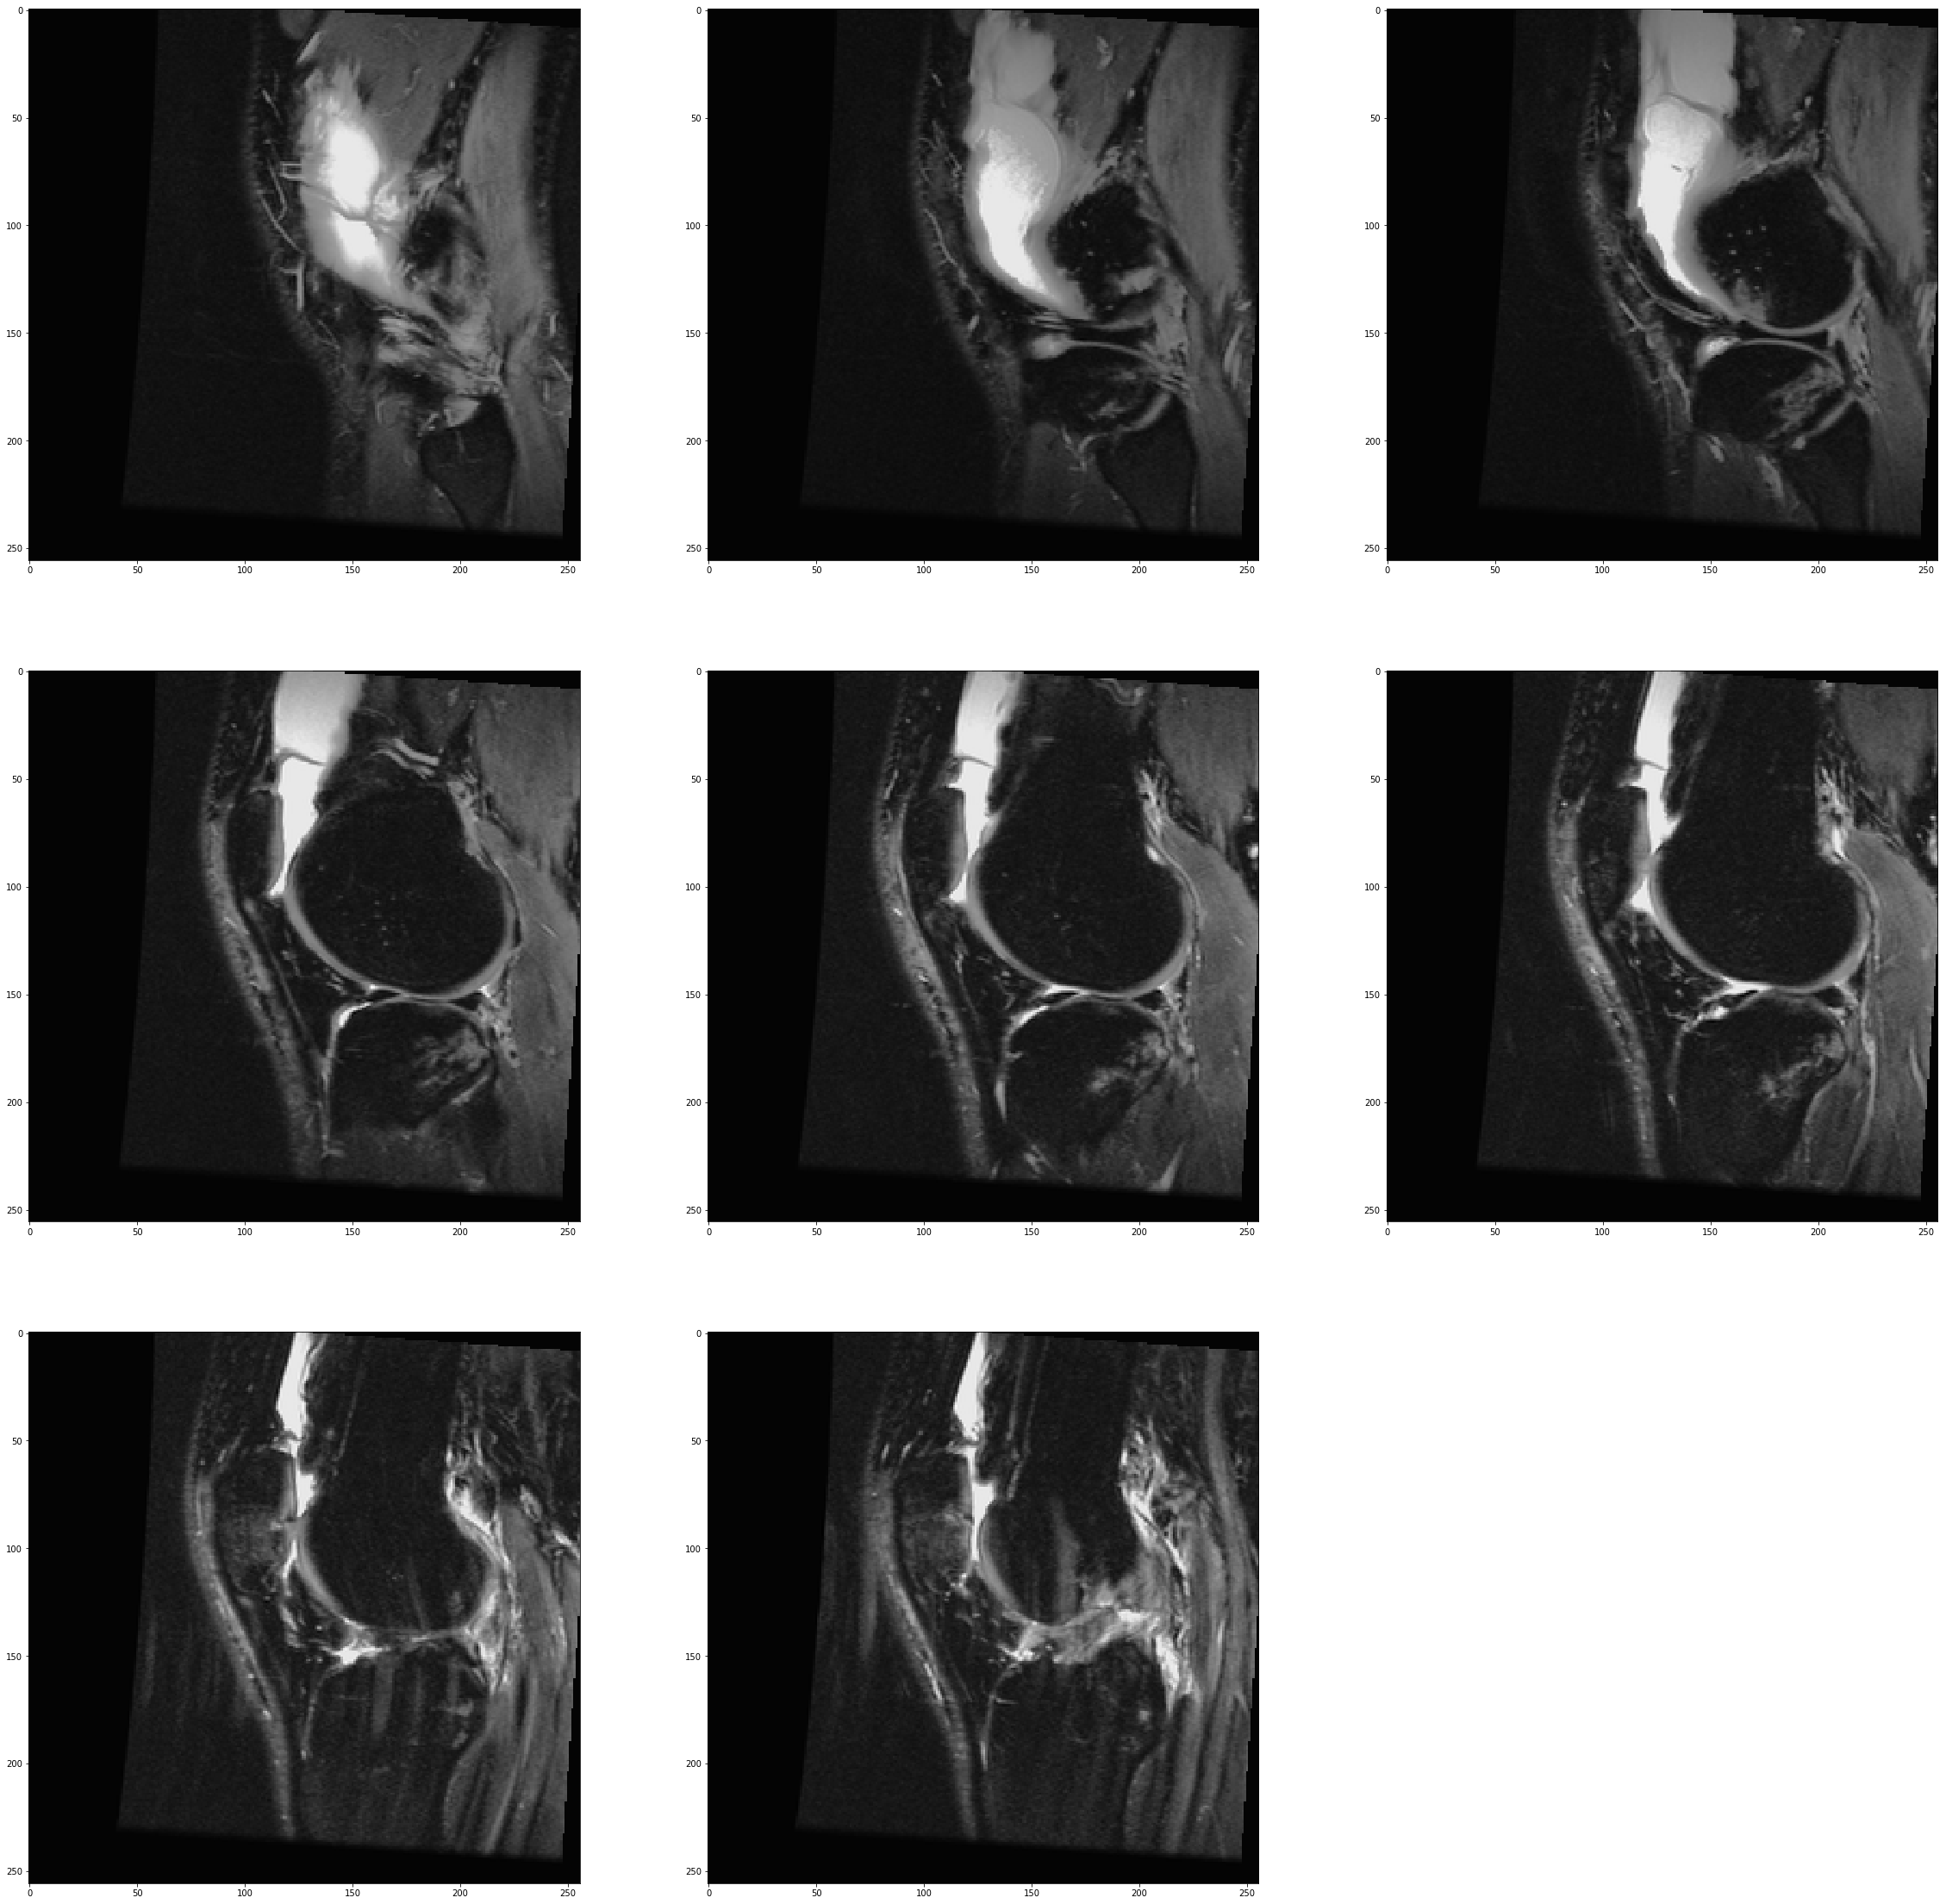

sagittal (1, 27, 256, 256)
(8, 3, 256, 256)
sagittal
0.0 1.0
(8, 256, 256, 3)
label 
 1
 1
 0
[torch.LongTensor of size 3]



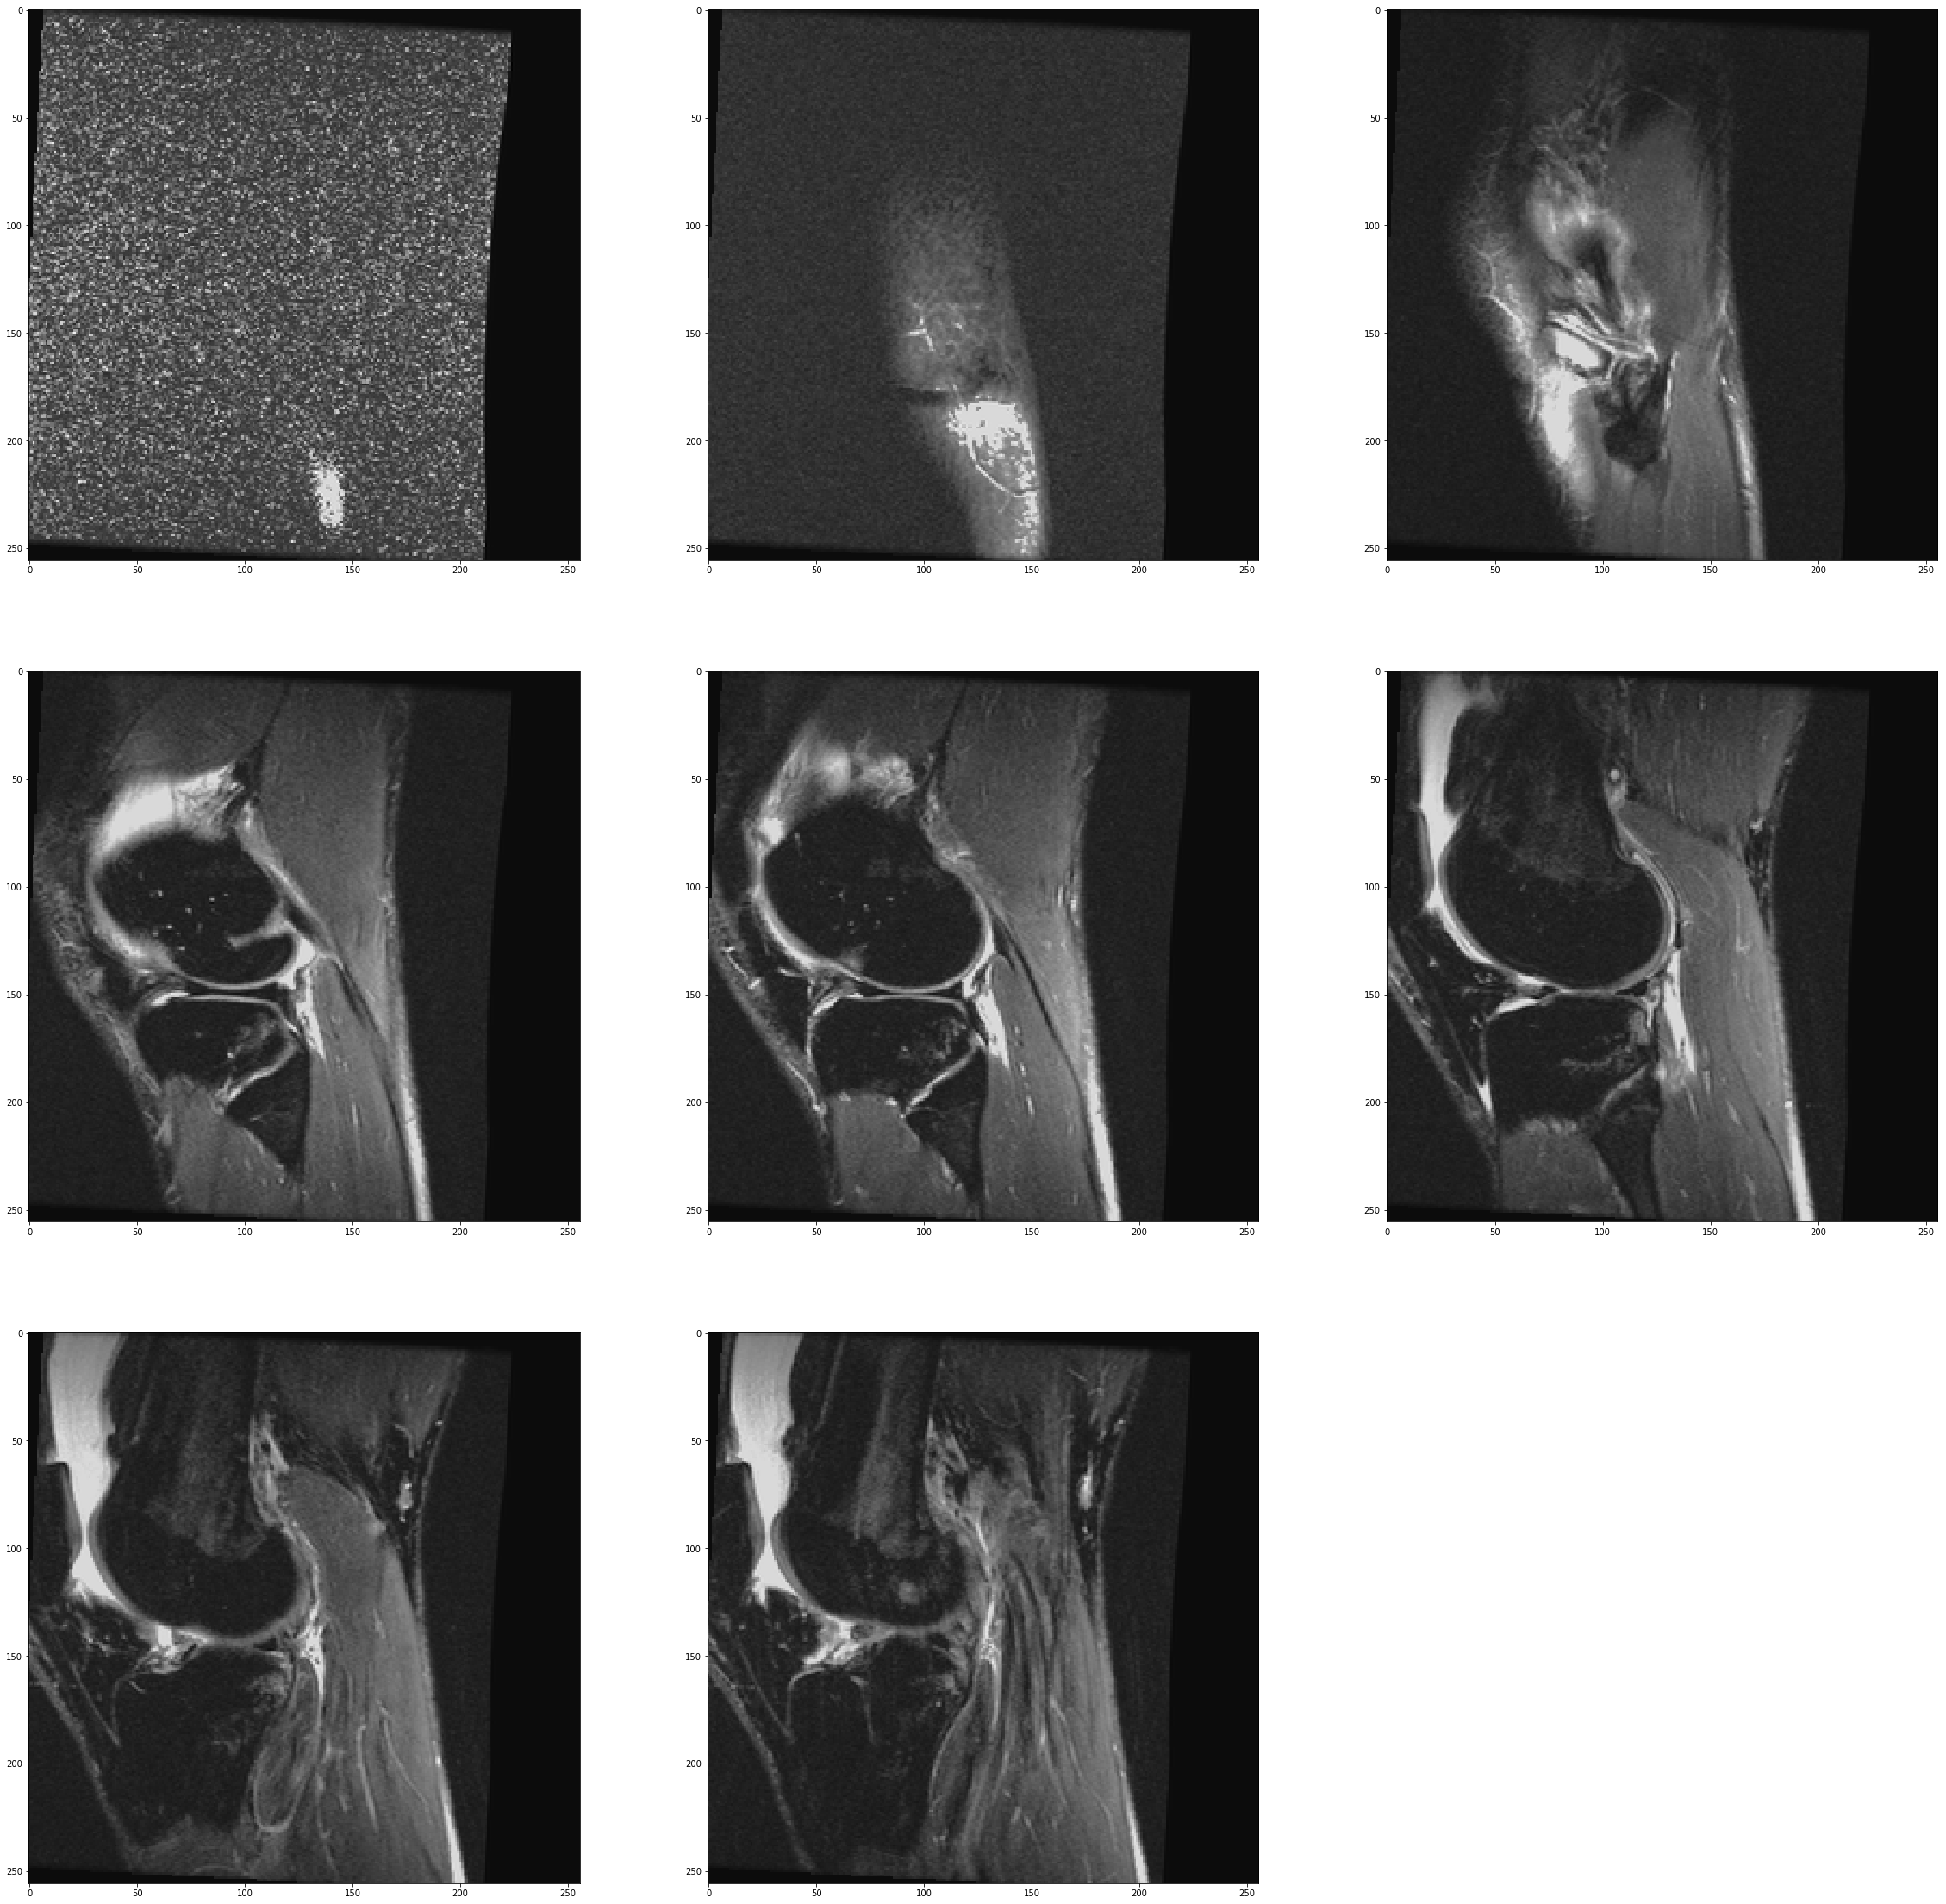

In [107]:
for i in range(1):
    viewImages(train_dataset, 0, 3, 'acl')

sagittal (1, 20, 256, 256)
(8, 3, 256, 256)
sagittal
0.0 1.0
(8, 256, 256, 3)
label 
 1
 0
 1
[torch.LongTensor of size 3]



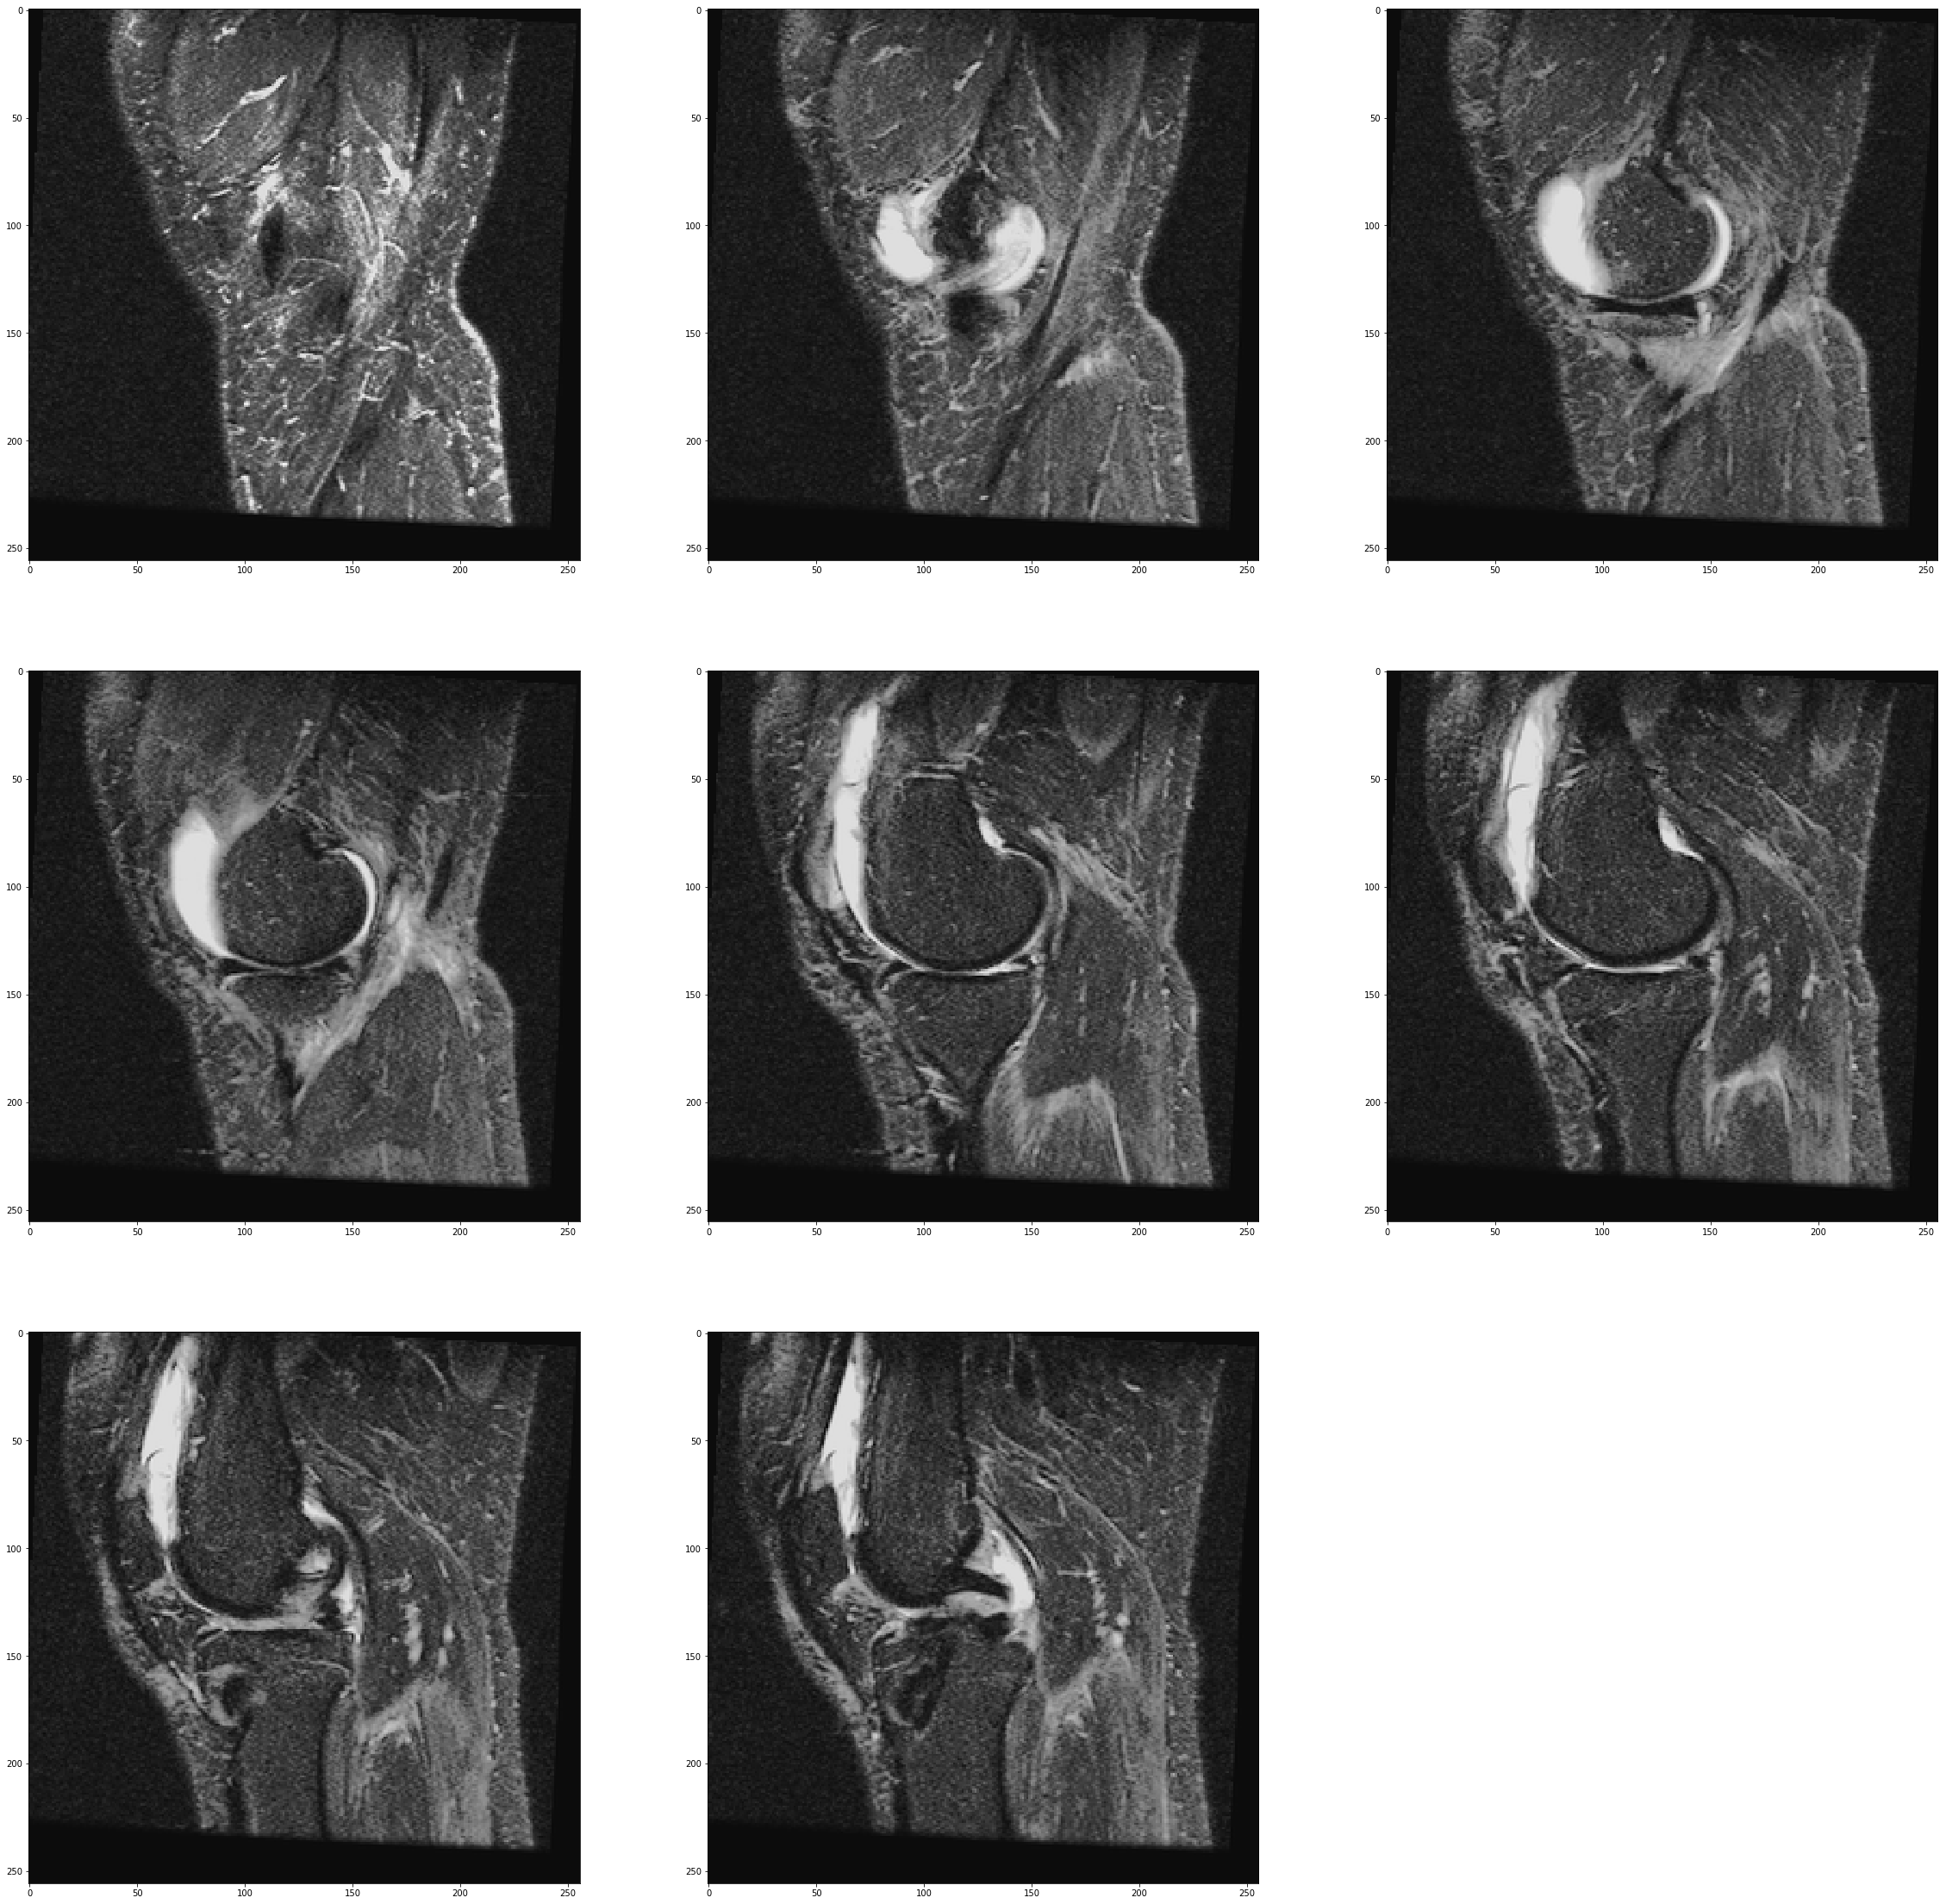

sagittal (1, 24, 256, 256)
(8, 3, 256, 256)
sagittal
0.0 1.0
(8, 256, 256, 3)
label 
 1
 0
 1
[torch.LongTensor of size 3]



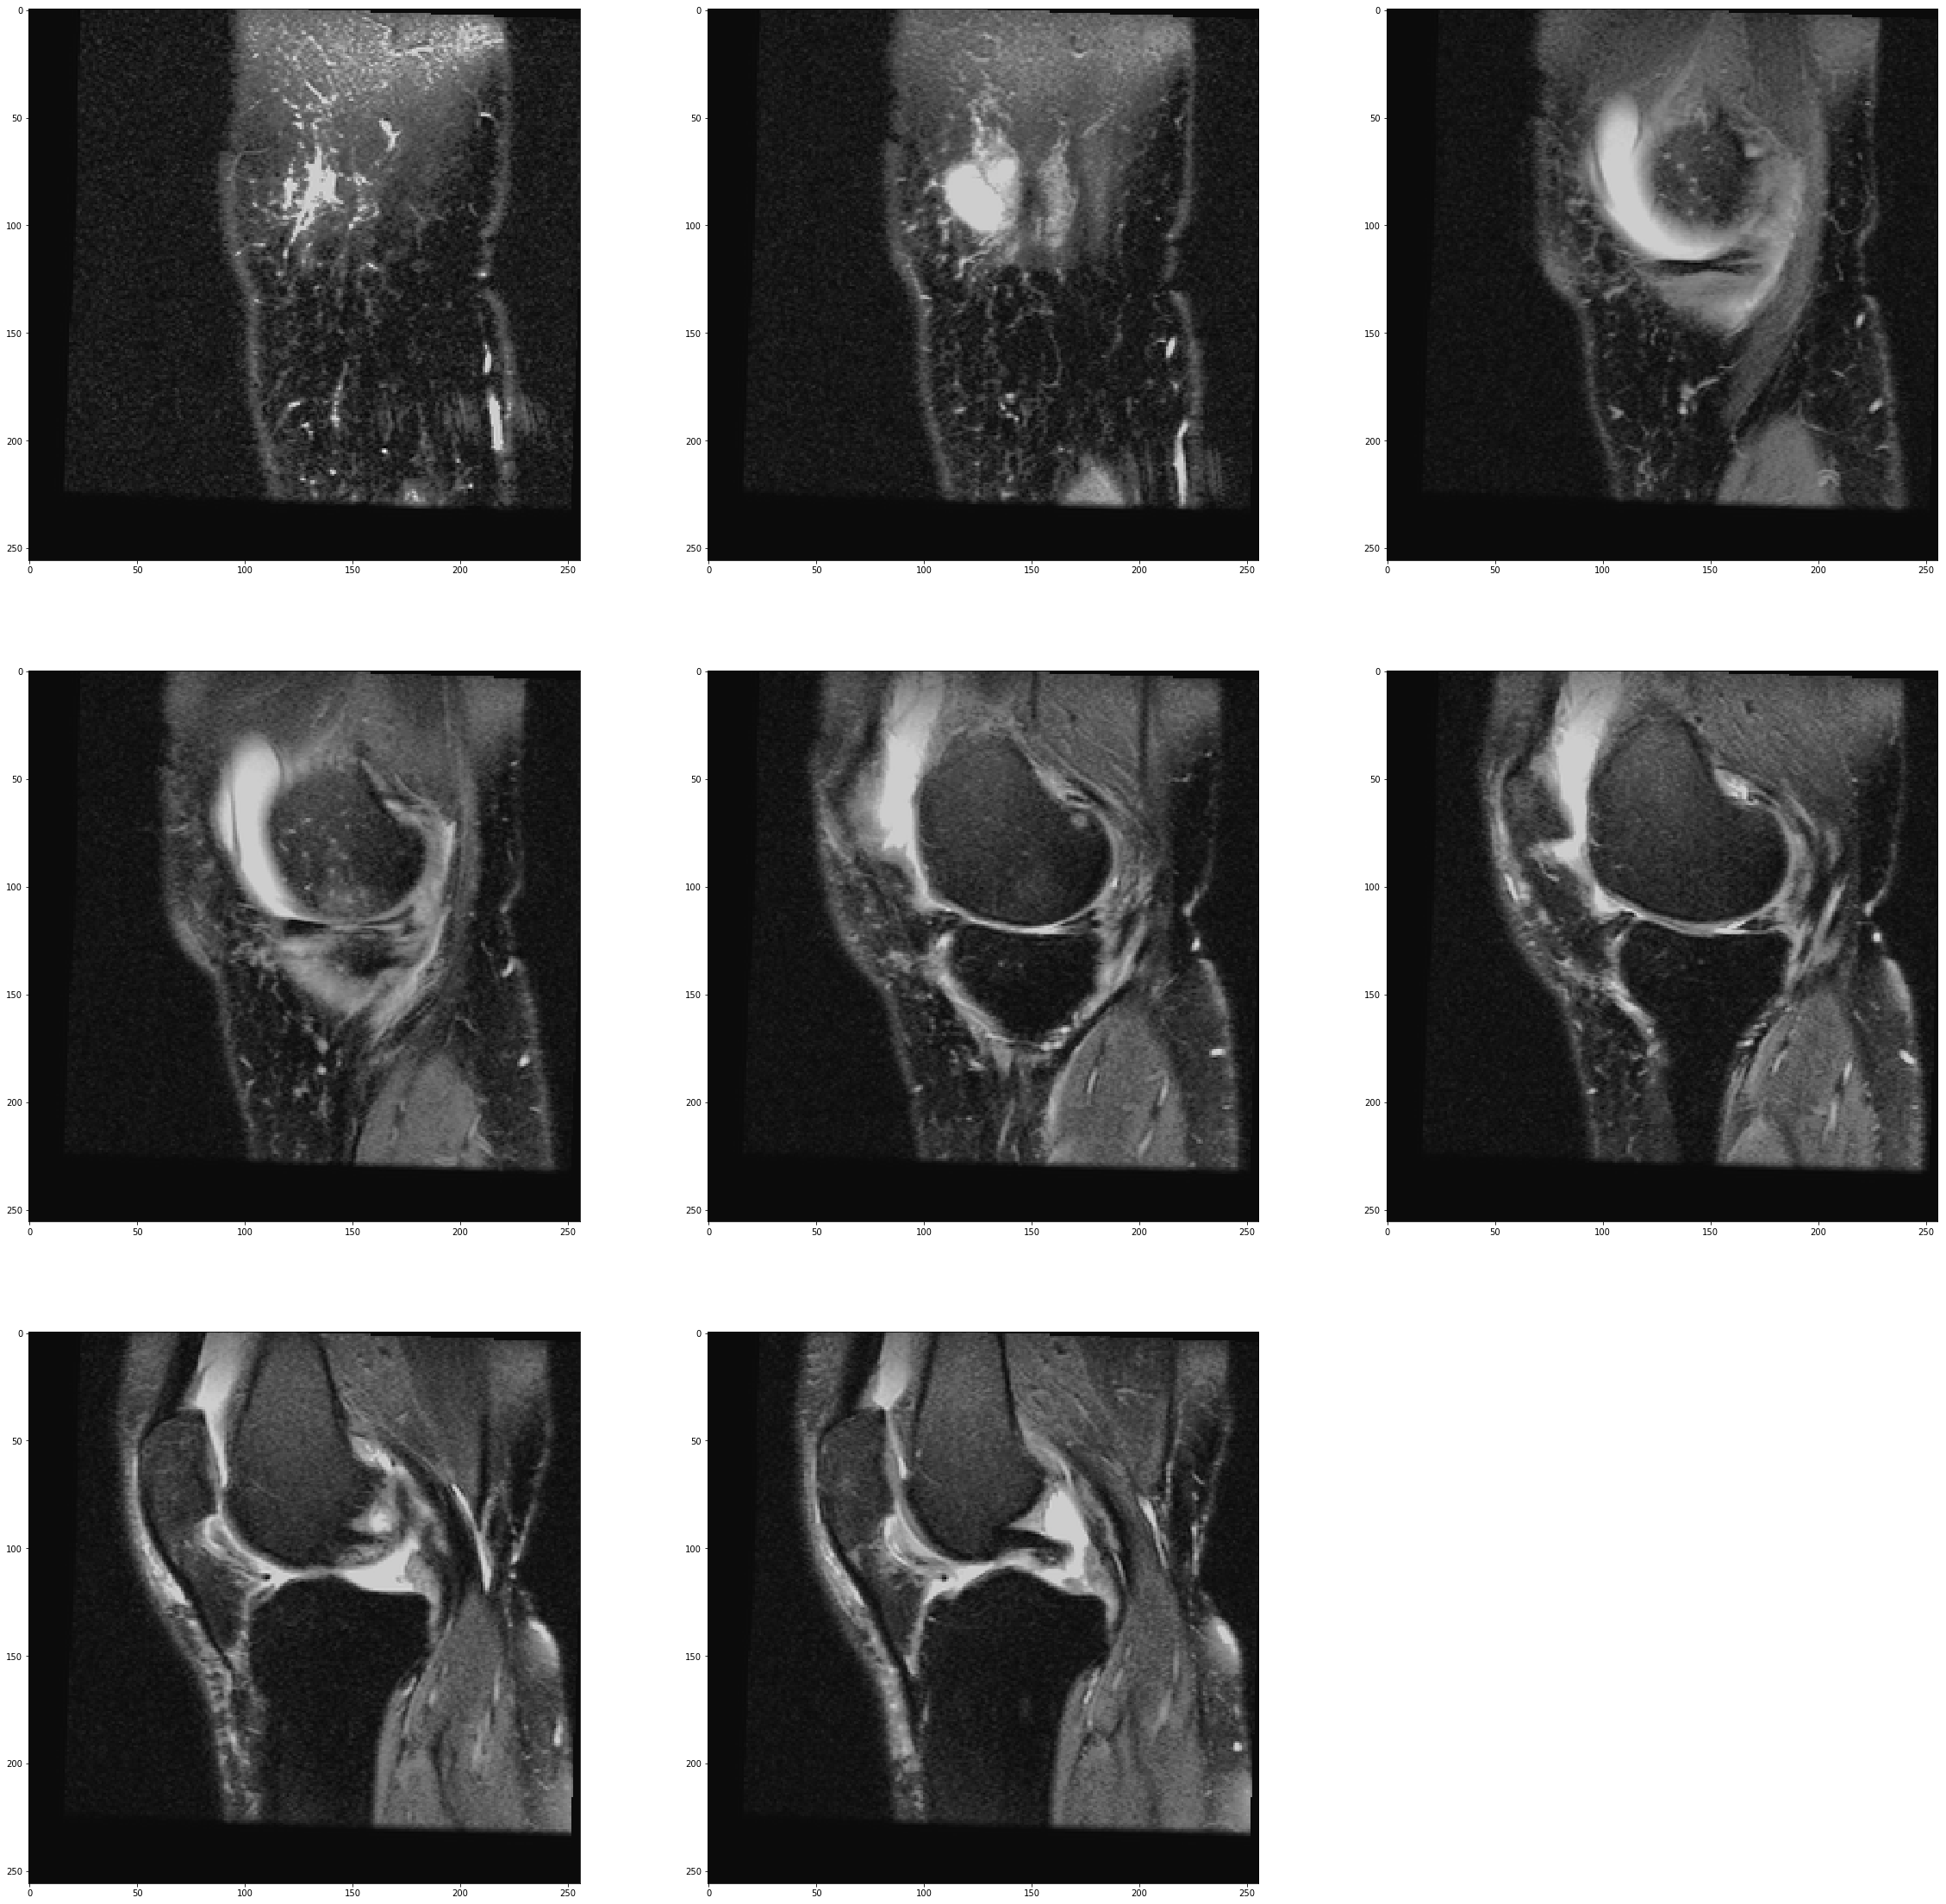

sagittal (1, 23, 256, 256)
(8, 3, 256, 256)
sagittal
0.0 1.0
(8, 256, 256, 3)
label 
 1
 0
 1
[torch.LongTensor of size 3]



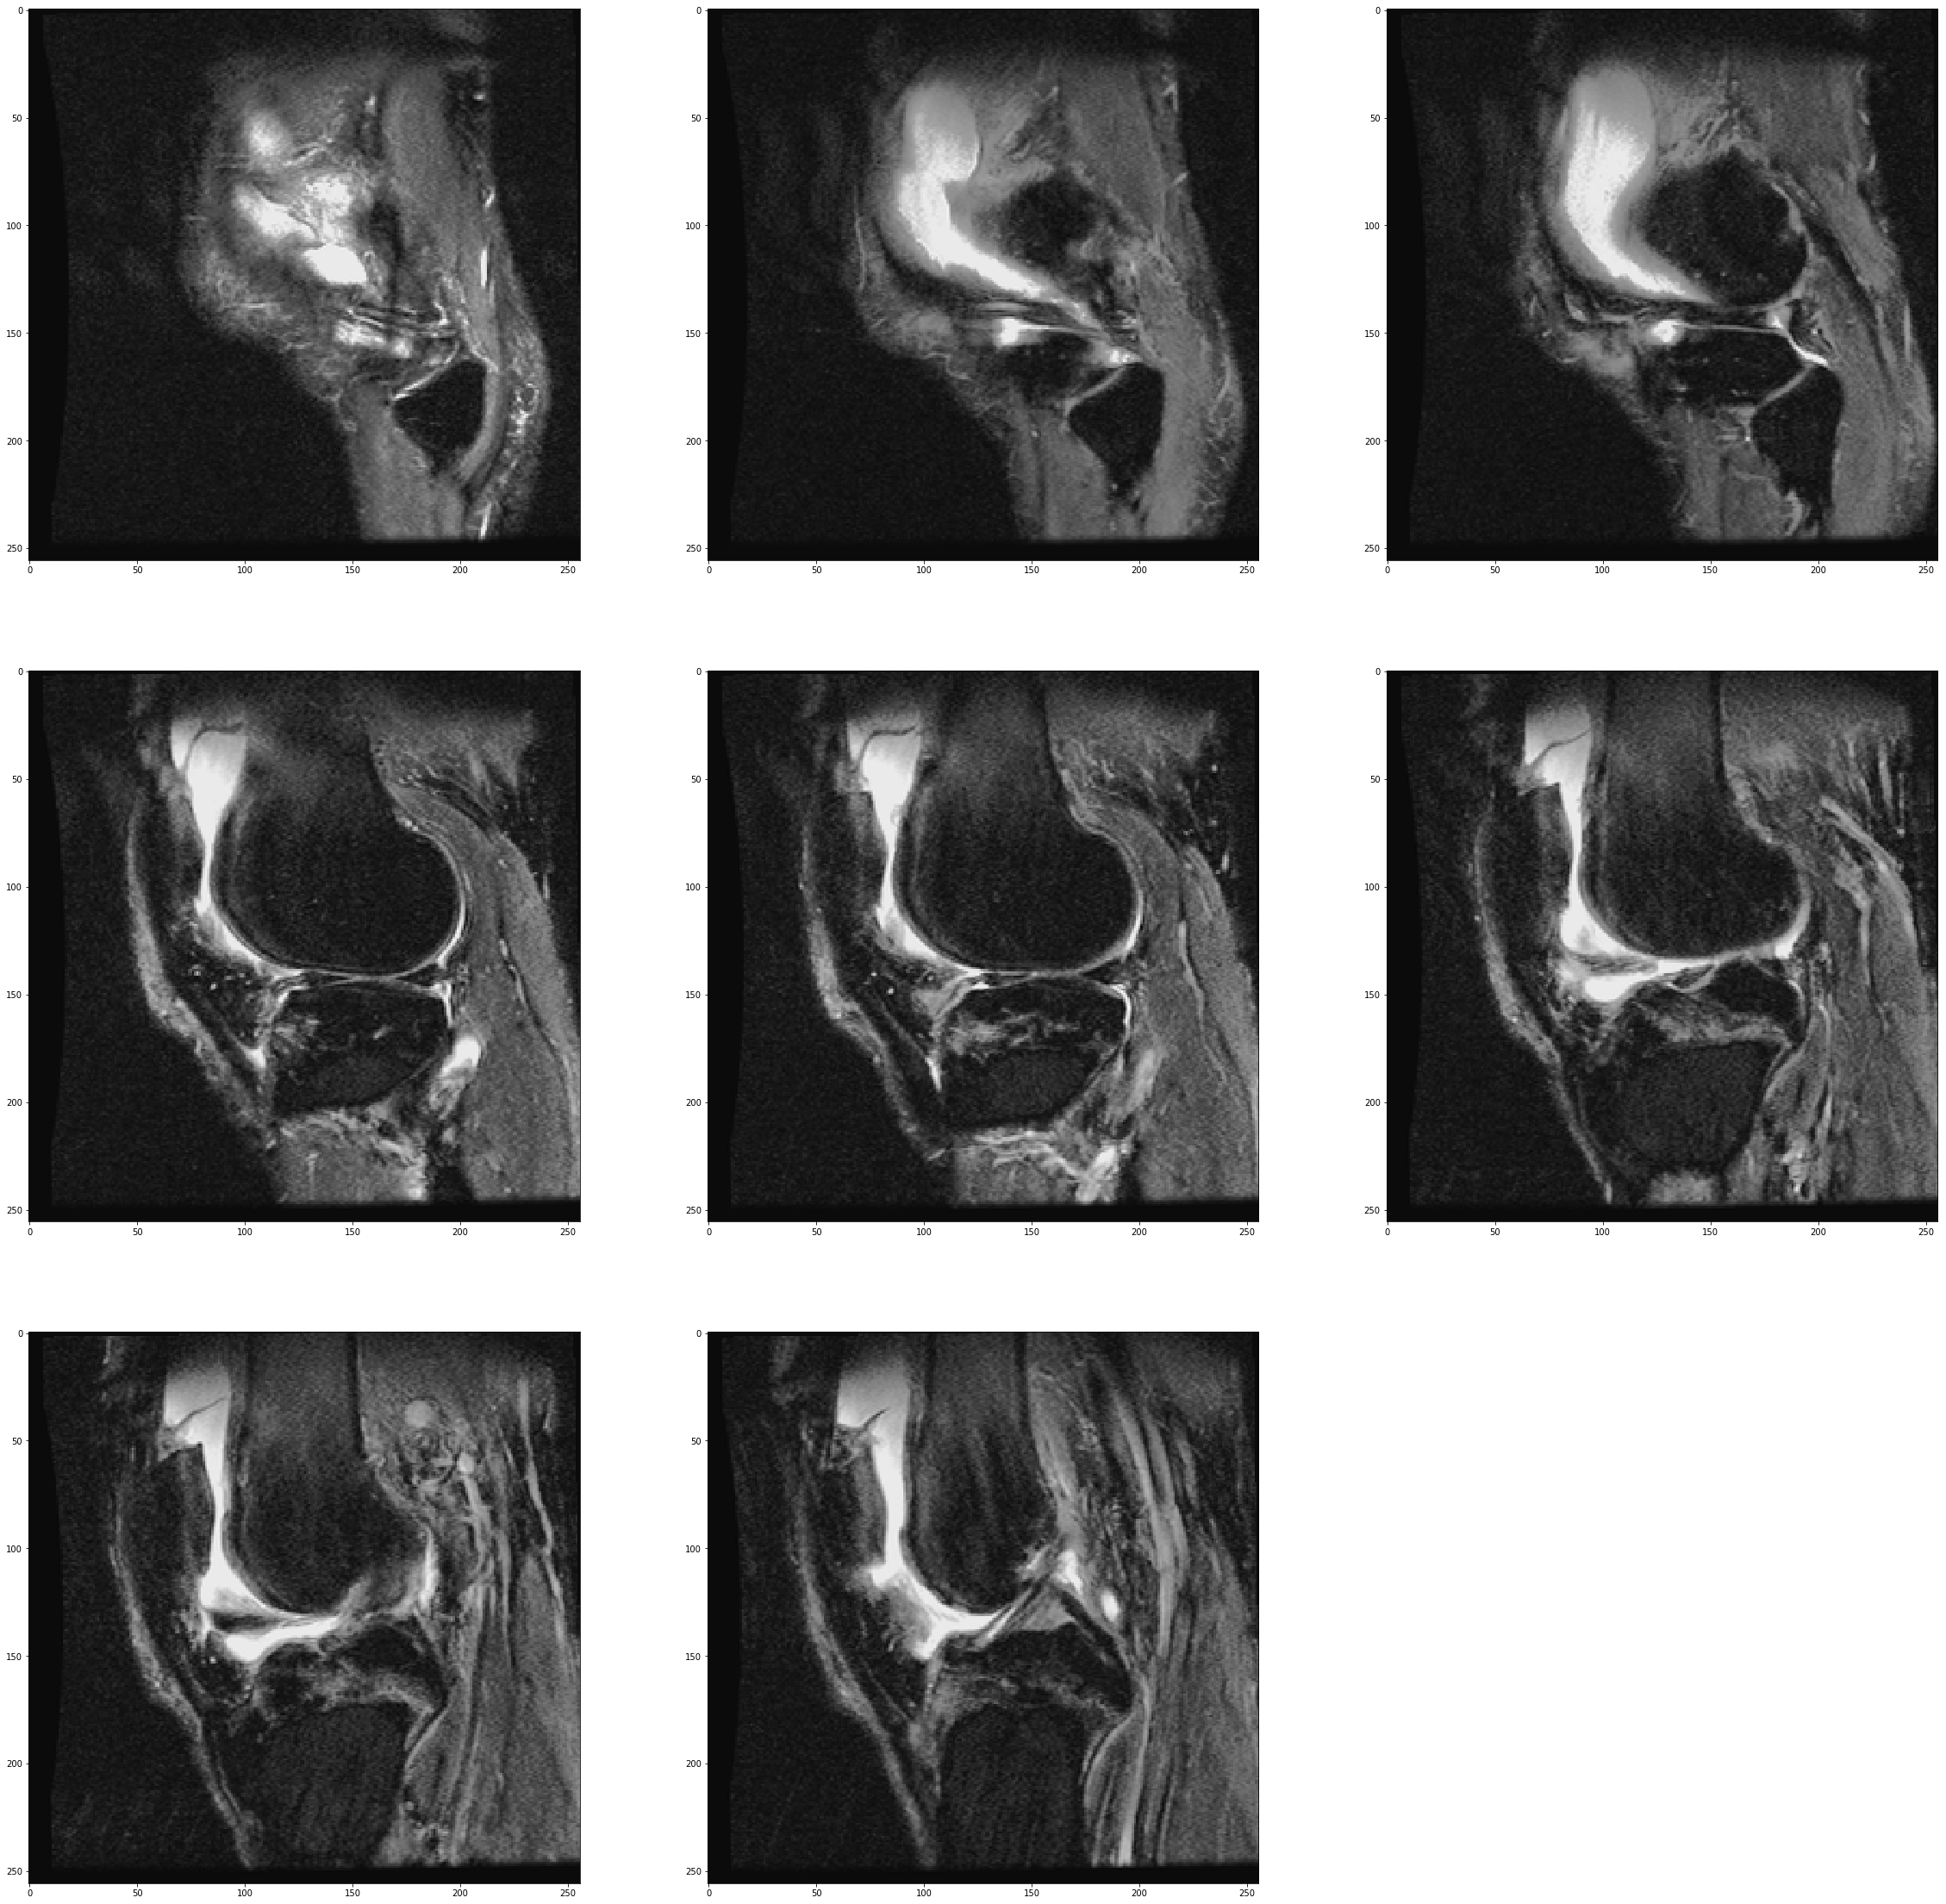

In [110]:
for i in range(1):
    viewImages(train_dataset, 0, 3, 'meniscus')

In [246]:
args2_ = {}    
args2_['datadir'] = '/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/data-3-views/'
args2_['view'] = 'all'
args2_['multilabel'] = True
args2_['horizontal_flip'] = True
args2_['fix_num_slices'] = True
args2_['fixing_method'] = 'inner'
args2_['num_slices'] = 8
args2_['extension'] = 'npy'
args2_['rotate'] = 5
args2_['shift'] = 50
args2_['reverse'] = False
args2_['workers'] = False
args2_['toy'] = False
args2_['verbose'] = False
args2_['weighted_loss'] = False
args2_['batch_size'] = 1

args2_['use_color_jitter'] = False
args2_['use_random_resized_crop'] = True

args2_['rgb'] = True
args2_['normalize'] = 'none'

In [252]:
args2_['scale'] = 256
args2 = Argument(args2_)
print(args2.extension)
# Load the datasets as a Dataset object
train_dataset2 = data.loader.Dataset(args2, 'train')
valid_dataset2 = data.loader.Dataset(args2, 'valid')
train_loader2, valid_loader2, test_loader2, rad_loader2 = load_data(args2)

npy
/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/data-3-views/train.csv
Counter({4: 323, 1: 228, 2: 141})
/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/data-3-views/valid.csv
Counter({4: 41, 1: 30, 2: 16})
/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/data-3-views/train.csv
Counter({4: 323, 1: 228, 2: 141})
/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/data-3-views/valid.csv
Counter({4: 41, 1: 30, 2: 16})
/deep/group/aihc-bootcamp-winter2018/medical-imaging/mr_knee_abnormality/data-3-views/test.csv
Counter({4: 41, 1: 33, 2: 19})


In [ ]:
for i in range(1):
    # looks bad because int -> float -> int
    # works if leave as float and change to [0,1]
    viewImages(train_dataset2)